# Single Photon Counting Test

## Imports

In [1]:
import h5py
import numpy as np
%matplotlib inline
#%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import timeit

In [2]:
import pycentroids

In [3]:
pycentroids._pycentroids.omp_info()

{'dynamic': 0, 'num_procs': 8, 'threads_limit': 2147483647, 'threads_max': 8}

In [4]:
help(pycentroids.find_photons)

Help on function find_photons in module pycentroids.pycentroids:

find_photons(images, filter=None, threshold=200, box=2, search_box=1, pixel_photon=9, pixel_bgnd=15, com_photon=9, overlap_max=0, sum_min=800, sum_max=1250, pixel_lut=None, pixel_lut_range=None, fit_pixels_2d=True, fit_pixels_1d_x=True, fit_pixels_1d_y=True, fit_constraints=None, fit_weights_2d=None, fit_weights_1d=None, return_pixels='none', return_map=False, tag_pixels=False)
    Find photons in CCD images and process for sub-pixel center.
    
    Parameters
    ----------
    images : numpy.ndarray
        Images to process of 3 dimensions
    filter : numpy.ndarray or None
        Filter image of 2d or 3d shape. Should be non-zero to filter pixels.
        If none, then no pixels are filtered.
    threshold : int
        Pixel value threshold for first search of images
    box : int
        Value for pixel box, Box size is
        (2 * box + 1) * (2 * box + 1)
    search_box : int
        Value for pixel seaarch box

## Load test data

In [5]:
!test -f images.h5 || curl -o images.h5 https://centroids-data.s3.amazonaws.com/images.h5

In [6]:
data = np.asarray(h5py.File('images.h5', 'r')['data'])

In [7]:
data.shape

(40, 1612, 3304)

In [8]:
#large_data = data.copy()
#for i in range(50):
#    large_data = np.concatenate((large_data, data))

## Call the fast code for single photon counting

In [9]:
#timeit.timeit("centroids.find_photons(large_data, 400, 2, store_pixels='none')", globals=globals(), number=1)
#pycentroids.find_photons(data, 400, 2, return_pixels='sorted')

In [10]:
df, out, pixels = pycentroids.find_photons(data, 3, 250, sum_max=1200, sum_min=800,
                                           pixel_photon=9, pixel_bgnd=20, com_photon=5,
                                           fit_pixels_2d=True, fit_pixels_1d_x=True, fit_pixels_1d_y=True,
                                           return_pixels='unsorted', return_map=True)

In [11]:
df.shape

(811, 44)

In [12]:
if out is not None:
    print(repr(out.shape))

(40, 1612, 3304)


In [13]:
if pixels is not None:
    print(pixels.shape)
    print()
    print(repr(pixels[0]))

(811, 5, 5)

array([[152, 152, 169, 157, 155],
       [172, 281, 468, 172, 173],
       [153, 249, 498, 227, 178],
       [163, 153, 142, 191, 156],
       [167, 167, 155, 164, 154]], dtype=uint16)


In [14]:
df.columns

Index(['Pixel X', 'Pixel Y', 'COM X', 'COM Y', 'COR COM X', 'COR COM Y', 'Int',
       'Bgnd', 'Overlap', 'Fit X', 'Fit Y', 'Fit Amp', 'Fit Sigma', 'Fit Bgnd',
       'Fit Err X', 'Fit Err Y', 'Fit Err Amp', 'Fit Err Sigma',
       'Fit Err Bgnd', 'Fit Fnorm', 'Fit Outcome', 'Fit StdErr', 'Fit 1DX X',
       'Fit 1DX Amp', 'Fit 1DX Sigma', 'Fit 1DX Bgnd', 'Fit 1DX Err X',
       'Fit 1DX Err Amp', 'Fit 1DX Err Sigma', 'Fit 1DX Err Bgnd',
       'Fit 1DX Fnorm', 'Fit 1DX Outcome', 'Fit 1DX StdErr', 'Fit 1DY Y',
       'Fit 1DY Amp', 'Fit 1DY Sigma', 'Fit 1DY Bgnd', 'Fit 1DY Err Y',
       'Fit 1DY Err Amp', 'Fit 1DY Err Sigma', 'Fit 1DY Err Bgnd',
       'Fit 1DY Fnorm', 'Fit 1DY Outcome', 'Fit 1DY StdErr'],
      dtype='object')

In [15]:
df = df[df['Fit Outcome'] < 4]
df = df[df['Fit 1DX Outcome'] < 4]
df = df[df['Fit 1DY Outcome'] < 4]
df.shape

(795, 44)

In [16]:
df

,Pixel X,Pixel Y,COM X,COM Y,COR COM X,COR COM Y,Int,Bgnd,Overlap,Fit X,...,Fit 1DY Amp,Fit 1DY Sigma,Fit 1DY Bgnd,Fit 1DY Err Y,Fit 1DY Err Amp,Fit 1DY Err Sigma,Fit 1DY Err Bgnd,Fit 1DY Fnorm,Fit 1DY Outcome,Fit 1DY StdErr
1,580.0,829.0,580.356059,828.923941,580.356678,828.923462,1103.8,151.8,0.0,580.386589,...,553.151349,0.411435,773.339461,0.072522,70.872862,-0.698577,36.439012,51.192168,1.0,3.588183
2,687.0,871.0,687.070889,871.450664,687.070535,871.450725,1061.6,153.6,0.0,687.070374,...,481.891553,0.250000,802.643379,0.000000,0.000000,-0.000000,0.000000,31.122616,1.0,10.696173
3,324.0,872.0,324.443909,871.939594,324.443722,871.939470,921.4,150.4,0.0,324.393199,...,405.458500,0.400362,791.416600,0.128705,91.872951,-0.929560,47.300752,66.590500,1.0,4.472102
4,447.0,872.0,446.793843,872.021455,446.793397,872.021511,1165.6,150.6,0.0,446.695073,...,545.507405,0.321473,791.997038,0.128169,92.545449,-0.367529,47.783036,67.560082,1.0,2.998112
5,493.0,872.0,493.402286,872.320000,493.402701,872.320660,952.0,154.0,0.0,493.380786,...,438.352324,0.363549,800.459071,0.169605,62.213029,-1.171986,31.506755,43.208911,1.0,9.773074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,379.0,875.0,379.140000,875.026582,379.139570,875.026513,846.4,157.4,0.0,379.176896,...,379.751396,0.323790,818.499442,0.090463,45.913565,-0.262829,23.705550,33.515984,1.0,8.501556
806,605.0,875.0,605.307549,874.699276,605.307654,874.699350,1044.4,153.4,0.0,605.259455,...,495.799094,0.394008,796.680364,0.095605,57.365328,-0.877622,29.175592,40.292096,1.0,3.396976
808,772.0,908.0,772.040729,908.307396,772.040520,908.307654,1123.8,149.8,0.0,771.998645,...,510.902535,0.464261,801.439125,0.105524,87.595423,4.402537,43.594549,58.002707,1.0,11.191181
809,615.0,988.0,615.172917,987.524074,615.172586,987.524262,947.6,152.6,0.0,615.189577,...,460.499514,0.520052,785.408805,0.080102,76.694248,1.438816,34.296989,34.482583,1.0,14.594359


## Plot the results 
### Whole image

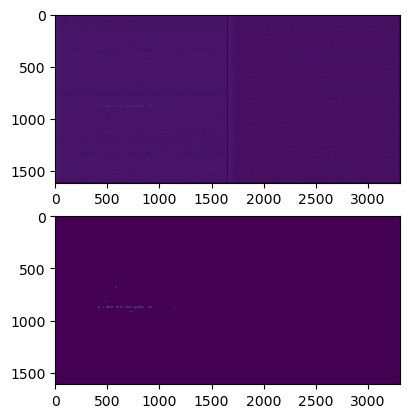

In [17]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1], vmin=150, vmax=300)
ax[1].imshow(out[-1]>0)

## Selected part of the image

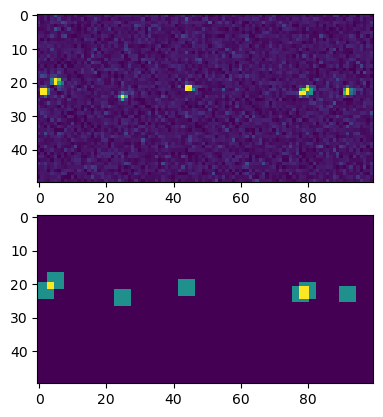

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1,850:900,600:700], vmin=150, vmax=300)
ax[1].imshow(out[-1,850:900,600:700] & 0xFF)

Text(0.5, 0, 'ADUs')

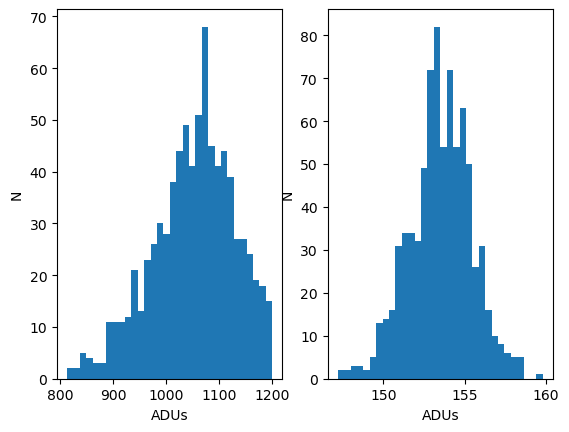

In [19]:
fig, ax = plt.subplots(1,2)
ax[0].hist(df['Int'], bins=32)
ax[0].set_ylabel('N')
ax[0].set_xlabel('ADUs')
ax[1].hist(df['Bgnd'], bins=32)
ax[1].set_ylabel('N')
ax[1].set_xlabel('ADUs')

In [20]:
xfrac = df['COM X'] - df['Pixel X']
yfrac = df['COM Y'] - df['Pixel Y']
xfrac_fit = df['Fit X'] - df['Pixel X']
yfrac_fit = df['Fit Y'] - df['Pixel Y']
xfrac_fit_1d = df['Fit 1DX X'] - df['Pixel X']
yfrac_fit_1d = df['Fit 1DY Y'] - df['Pixel Y']

Text(0.5, 0, 'Pixel Fractional Coord')

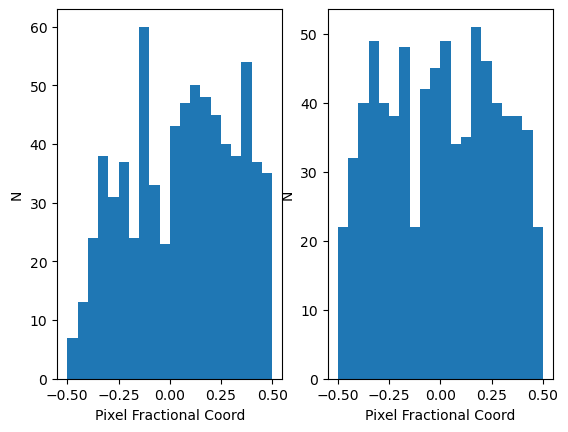

In [21]:
fig, ax = plt.subplots(1,2)
ax[0].hist(xfrac, bins=20, range=(-0.5, 0.5))
ax[1].hist(yfrac, bins=20, range=(-0.5, 0.5))
ax[0].set_ylabel('N')
ax[0].set_xlabel('Pixel Fractional Coord')
ax[1].set_ylabel('N')
ax[1].set_xlabel('Pixel Fractional Coord')

Text(0.5, 0, 'Pixel Fractional Coord')

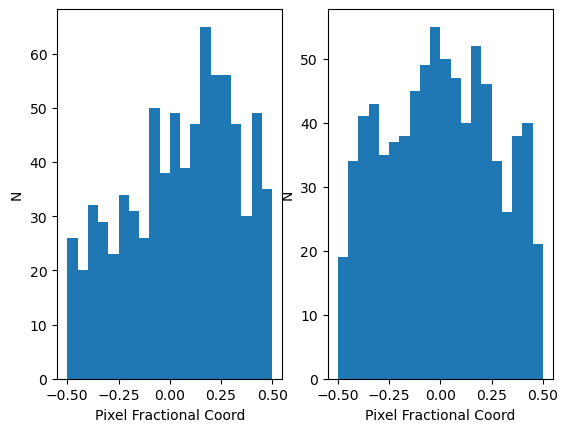

In [22]:
fig, ax = plt.subplots(1,2)
ax[0].hist(xfrac_fit, bins=20, range=(-0.5, 0.5))
ax[1].hist(yfrac_fit, bins=20, range=(-0.5, 0.5))
ax[0].set_ylabel('N')
ax[0].set_xlabel('Pixel Fractional Coord')
ax[1].set_ylabel('N')
ax[1].set_xlabel('Pixel Fractional Coord')

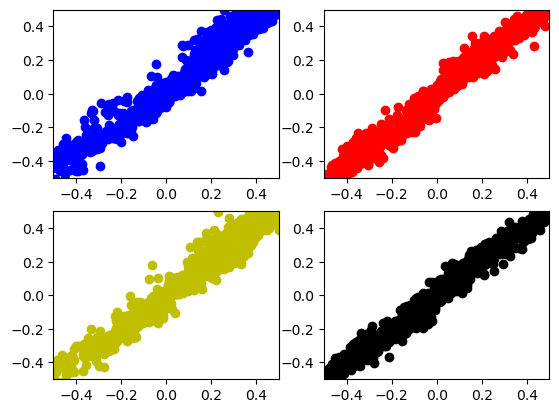

In [23]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(xfrac_fit, xfrac, 'bo')
ax[0,1].plot(yfrac_fit, yfrac, 'ro')
ax[1,0].plot(xfrac_fit_1d, xfrac, 'yo')
ax[1,1].plot(yfrac_fit_1d, yfrac, 'ko')
for _ax in ax:
    for a in _ax:
        a.set_xlim([-0.5, 0.5])
        a.set_ylim([-0.5, 0.5])

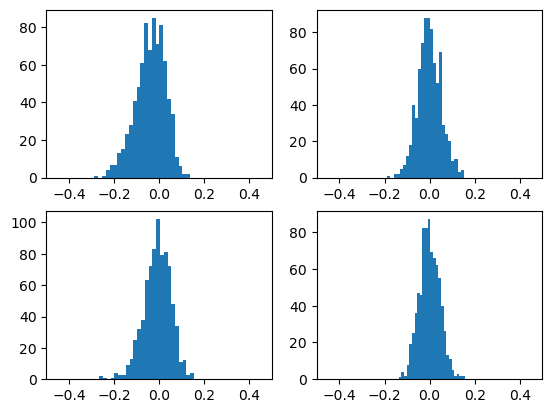

In [24]:
fig, ax = plt.subplots(2,2)
ax[0,0].hist(xfrac_fit - xfrac, 25)
ax[0,1].hist(yfrac_fit - yfrac, 25)
ax[1,0].hist(xfrac_fit_1d - xfrac, 25)
ax[1,1].hist(yfrac_fit_1d - yfrac, 25)
for a in ax.ravel():
    a.set_xlim([-0.5, 0.5])

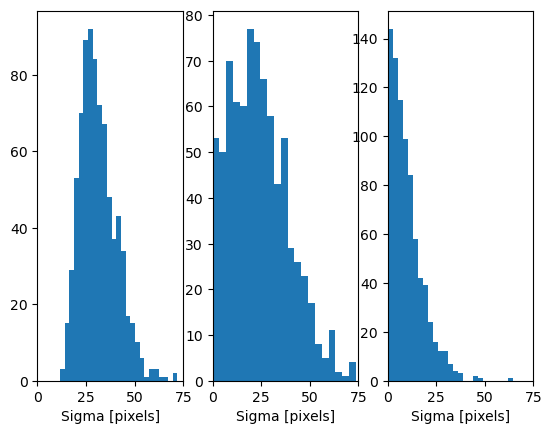

In [25]:
fig, ax = plt.subplots(1,3)
ax[0].hist(df['Fit StdErr'], bins=25)
ax[0].set_xlabel('Sigma [pixels]')
ax[1].hist(df['Fit 1DX StdErr'], bins=25)
ax[1].set_xlabel('Sigma [pixels]')
ax[2].hist(df['Fit 1DY StdErr'], bins=25)
ax[2].set_xlabel('Sigma [pixels]')
for a in ax:
    a.set_xlim(0, 75)

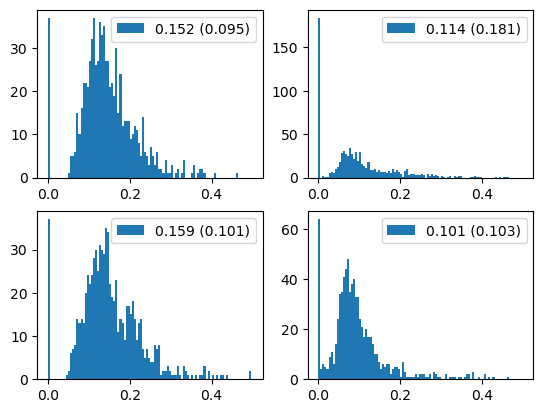

In [26]:
def plot_hist(ax, x):
    ax.hist(x, bins=100, range=(0,0.5),
            label='{:.3f} ({:.3f})'.format(np.mean(x), np.std(x)))
    ax.legend()
    
fig, ax = plt.subplots(2,2)
plot_hist(ax[0,0], df['Fit Err X'])
plot_hist(ax[1,0], df['Fit Err Y'])
plot_hist(ax[0,1], df['Fit 1DX Err X'])
plot_hist(ax[1,1], df['Fit 1DY Err Y'])

In [27]:
pycentroids._pycentroids.__version__

'30758b6+'